In [1]:
#Sabri Süer
#504191535
#########################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
#import any other non-machine learning modules that you wish
from sklearn.model_selection import KFold
#SHORTCUTS: Alt + Enter includes new cell below, CTRL + Enter executes the current cell
##########################
dataset1_training = pd.read_csv("train1.csv")
dataset1_test = pd.read_csv("test1.csv")

dataset2_training = pd.read_csv("train2.csv")
dataset2_training_modified = pd.read_csv("train2_modified.csv") #will be used in Part D
dataset2_test = pd.read_csv("test2.csv")

**Notes**

- **My comments are written in bold style like this text to make them easier to see.**
- Numbered lists with normal texts are copied from the homework pdf for reference.

In [2]:
#By printing a dataframe, you can view the data in csv format
print(dataset1_training)
# or
# from IPython.display import display, HTML
# display(HTML(dataset1_training.to_html())) # for better looking html tables

           x1        x2  y
0   -0.260234  2.767817  0
1    3.466190  6.054691  1
2   -2.036224  4.491902  0
3    2.434426  6.638656  1
4   -0.541338  3.210246  0
5    1.873406  8.177618  1
6   -2.972132  2.392596  0
7    2.394965  5.723560  1
8    1.514142  7.668679  1
9    0.563622  7.673720  1
10   2.458662  6.210246  1
11  -2.693311  3.414873  0
12   4.958882  2.513147  1
13  -0.197478  5.340615  1
14   2.717206  6.351128  1
15  -0.665288  3.517672  0
16   0.115434  0.540752  0
17   1.637765  7.512790  1
18   2.535947  6.034393  1
19  -1.082145  2.596857  0
20  -0.635644  4.848119  0
21  -0.979171  4.365201  0
22  -2.842000  4.494381  0
23  -0.714753  4.510968  0
24   1.574653  1.063995  0
25   2.251013  4.378819  1
26   2.681824  7.062246  1
27   3.486667  3.681108  1
28  -1.515356  2.352268  0
29  -1.485858  4.668679  0
..        ...       ... ..
170  2.618961  6.500097  1
171  0.158000  7.494381  1
172  2.291857  5.279079  1
173  3.359871  4.629356  1
174  2.500872  5.241821  1
1

# Part A: Examine training sets

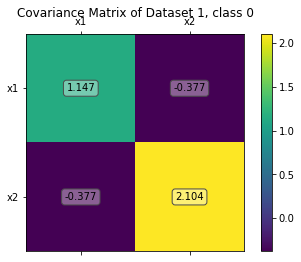

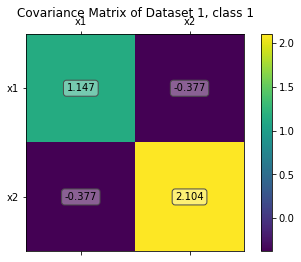

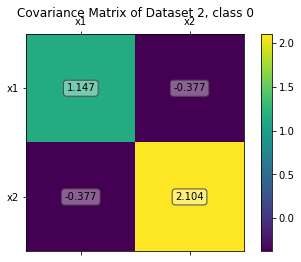

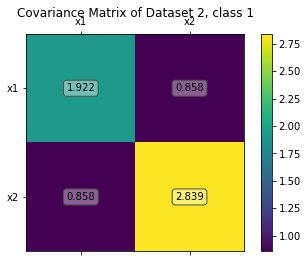

In [7]:
# 1. PLOTTING COVARIANCE MATRICES
# using function to avoid repeating codes
def plot_covariance_matrix(cov_mtrx, name):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title("Covariance Matrix of " + name)
    cax = ax.matshow(cov_mtrx, interpolation='nearest')
    # improved plot with the help of: https://stackoverflow.com/a/20998634
    for (i, j), z in np.ndenumerate(cov_mtrx):  # this loop is for displaying values inside cells
        ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='#ffffff60', edgecolor='0.3'))
    fig.colorbar(cax)
    ax.set_xticklabels([''] + ['x1', 'x2'])
    ax.set_yticklabels([''] + ['x1', 'x2'])

# my implementation of covariance matrix algorithm,
# numpy and pandas already has .cov and will be used for convenience
def calc_covariance_matrix(dataset):
    f = dataset[["x1", "x2"]]
    f_minus_f_mean = f - f.mean()
    return ((f_minus_f_mean).T.dot(f_minus_f_mean) / (len(f) - 1)).values


dataset1_training_0, dataset1_training1 = dataset1_training[dataset1_training['y'] == 0], dataset1_training[dataset1_training['y'] == 1]

dataset2_training_0, dataset1_training2 = dataset2_training[dataset2_training['y'] == 0], dataset2_training[dataset2_training['y'] == 1]

# plotting covariance matrix of dataset 1, class 0
plot_covariance_matrix(dataset1_training_0[["x1", "x2"]].cov(), "Dataset 1, class 0")

# plotting covariance matrix of dataset 1, class 0
plot_covariance_matrix(dataset1_training_0[["x1", "x2"]].cov(), "Dataset 1, class 1")

# plotting covariance matrix of dataset 1, class 0
plot_covariance_matrix(dataset1_training_0[["x1", "x2"]].cov(), "Dataset 2, class 0")

# plotting covariance matrix of dataset 2
plot_covariance_matrix(dataset2_training_0[["x1", "x2"]].cov(), "Dataset 2, class 1")

plt.show()

<b>These covariance matrices show that x2 is more spread out in both datasets. x1 is more spread out in the first dataset and x2 is like that in the second dataset. They both have positive covariance between features which means features are dependent and when one feature increases, the other will too.</b>

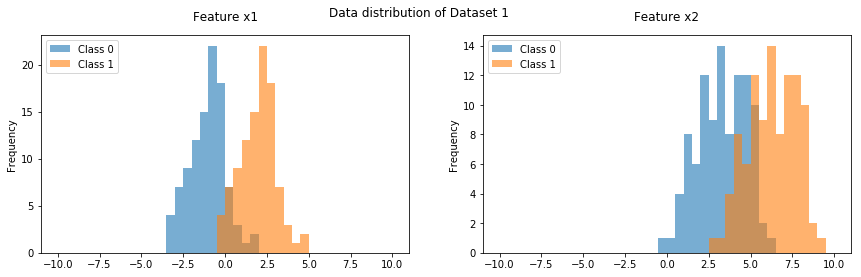

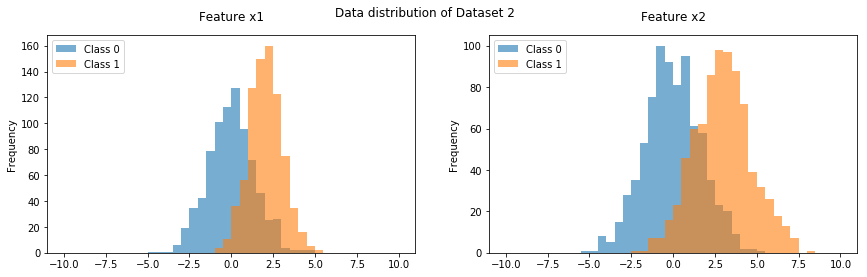

In [201]:
# 2. PLOTTING HISTOGRAMS
def plot_histogram(df, title):
    fig = plt.figure()
    plt.subplots_adjust(right=2)
    fig.suptitle("Data distribution of " + title, x=1)
    ax1 = fig.add_subplot(121)  # I used two side-by-side subplots for better spacing
    ax1.set_title("Feature x1", pad=15.0)
    ax1 = df[df.y == 0]["x1"].plot.hist(bins=[i/10 for i in range(-100, 101, 5)], alpha=0.6, ax=ax1)
    ax1 = df[df.y == 1]["x1"].plot.hist(bins=[i/10 for i in range(-100, 101, 5)], alpha=0.6, ax=ax1)
    ax1.legend(["Class 0", "Class 1"], loc="upper left")
    ax2 = fig.add_subplot(122)
    ax2.set_title("Feature x2", pad=15.0)
    ax2 = df[df.y == 0]["x2"].plot.hist(bins=[i/10 for i in range(-100, 101, 5)], alpha=0.6, ax=ax2)
    ax2 = df[df.y == 1]["x2"].plot.hist(bins=[i/10 for i in range(-100, 101, 5)], alpha=0.6, ax=ax2)
    ax2.legend(["Class 0", "Class 1"], loc="upper left")
plot_histogram(dataset1_training, "Dataset 1")
plot_histogram(dataset2_training, "Dataset 2")

<b>Both features in both sets have some degree of overlapping which might make classifying difficult. x1 in dataset 1 seems to be most seperable while x2 is harder to separate in both sets.</b>

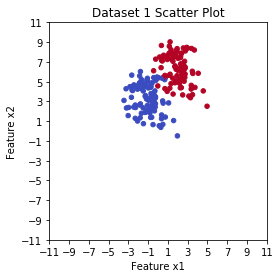

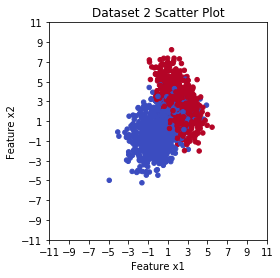

In [206]:
# 3. PLOTTING SCATTER PLOTS
def plot_scatter(df, title, equal_aspect=False):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax = df.plot.scatter(x="x1", y="x2", c="y", colormap="coolwarm", colorbar=False, ax=ax)
    ax.set_title(title)
    ax.set_ylabel("Feature x2")
    ax.set_xlabel("Feature x1")
    pos = ax.set_xlim(-9, 9)
    pos = ax.set_ylim(-9, 9)
    if equal_aspect:
        ax.set_aspect(aspect="equal")
        ticks = ax.set_xticks([i for i in range(-11,12, 2)])
        ticks = ax.set_yticks([i for i in range(-11,12, 2)])
plot_scatter(dataset1_training, "Dataset 1 Scatter Plot", True)
plot_scatter(dataset2_training, "Dataset 2 Scatter Plot", True)

<b>This looks contradictory compared to covariance matrix. For example, x1's variance 3.4 in dataset 1 and 2.5 in dataset 2. However dataset 2 covers a bigger range of x1's axis in dataset 2 as seen here. I assume since we divide by $ n\_samples-1 $ and dataset 2 has so many more samples, its variance is lower. Therefore covariance is affected by density too, not just spread.</b>

# Part B: Implement Naive Bayes Classifier

1. Estimate the mean vectors for each class using the training data and consider the covariance matrices that you have calculated in Part A.: (just print() them)

In [208]:
def print_mean_and_covariance(dataset):
    print("Class 0\nMeans\n", dataset[dataset.y==0][["x1", "x2"]].mean().values, "\n",
          "Covariance Matrix\n", dataset[dataset.y==0][["x1", "x2"]].cov(), sep="", end="\n\n")
    print("Class 1\nMeans\n", dataset[dataset.y==1][["x1", "x2"]].mean().values, "\n",
          "Covariance Matrix\n", dataset[dataset.y==1][["x1", "x2"]].cov(), "\n", sep="")

<b>Dataset 1 Statistics</b>

In [209]:
print_mean_and_covariance(dataset1_training)

Class 0
Means
[-1.04624698  3.26924606]
Covariance Matrix
          x1        x2
x1  1.147041 -0.376974
x2 -0.376974  2.104315

Class 1
Means
[1.95375302 6.26924606]
Covariance Matrix
          x1        x2
x1  1.147041 -0.376974
x2 -0.376974  2.104315



<b>Dataset 2 Statistics</b>

In [210]:
print_mean_and_covariance(dataset2_training)

Class 0
Means
[ 0.00246486 -0.01971604]
Covariance Matrix
          x1        x2
x1  1.922112  0.857977
x2  0.857977  2.839344

Class 1
Means
[2.0536608  2.97765078]
Covariance Matrix
          x1        x2
x1  0.997699 -0.818803
x2 -0.818803  2.949629



2. Compute the discriminant function gi(x) for each class regarding the given cases.

<b>Deriving the formulas</b>

$ g_i(x)=P(c_i|x)=\frac{P(x|c_i) P(c_i)}{P(x)} $
 - Discard $P(x)$.

$ g_i(x)=P(c_i|x)=P(x|c_i) P(c_i) $
- Assume that $P(x|c_i)$ is a normal distribution. $P(x|c_i)=\frac{1}{2\pi^{d/2}|\Sigma_i|^{1/2}} exp\left[ -\frac{1}{2} (x-\mu_i)^t \Sigma_i^{-1} (x-\mu_i) \right]$.
- Take ln of $ P(c_i|x) $.

$ g_i(x)=ln\left(P(c_i|x)\right)=ln\left(P(x|c_i)P(c_i)\right) = ln\left(P(x|c_i)\right) + ln\left(P(c_i)\right) $

$ g_i(x)=-\frac{1}{2} (x-\mu_i)^t \Sigma_i^{-1} (x-\mu_i) - \frac{d}{2}ln(2\pi) - \frac{1}{2}ln|\Sigma_i|  + ln\left(P(c_i)\right) $
- Discard $ \frac{d}{2}ln(2\pi) $ as it is constant.
- Discard $ ln\left(P(c_i)\right) $ as there are equal amount of samples for both classes.
- $(x-\mu_i)^t \Sigma^{-1} (x-\mu_i)$ is squared Mahalanobis distance. General form: $||x||_S = \sqrt{(x-\mu)^t S (x-\mu)}$

<p style="border-style: solid; border-width: 1px;">
$ g_i(x)=-\frac{1}{2} ||x-\mu_i||_{\Sigma_i^{-1}}^2 - \frac{1}{2}ln|\Sigma_i| $: Case 3 - General case
</p>

If $ \Sigma_i=\Sigma $ for all $ i $s:

$ g_i(x)=-\frac{1}{2} ||x-\mu_i||_{\Sigma^{-1}}^2 - \frac{1}{2}ln|\Sigma| $
- Discard $- \frac{1}{2}ln|\Sigma|$ as it is constant.

<p style="border-style: solid; border-width: 1px;">
$ g_i(x)=-\frac{1}{2}||x-\mu_i||_{\Sigma^{-1}}^2 $: Case 1
</p>

If $ \Sigma_i=\sigma_i^2I $ for all $ i $s:

$ g_i(x)=-\frac{1}{2} (x-\mu_i)^t (\sigma_i^2 I)^{-1} (x-\mu_i) - \frac{1}{2}ln|\sigma_i^2 I| $

$ g_i(x)=-\frac{1}{2} (x-\mu_i)^t \frac{1}{\sigma_i^2}I (x-\mu_i) - \frac{1}{2}ln(\sigma_i^4) $

<p style="border-style: solid; border-width: 1px;">
$ g_i(x)=-\frac{1}{2\sigma_i^2} || x-\mu_i ||_2^2 - 2 ln(\sigma_i) $: Case 2
</p>

In [211]:
# Note: Since datasets have equal samples for each class,
# I discarded the ln(P(ci)) term from all of the computations

def train_bayes(X_train, y_train):
    # this function returns a function called discriminator. it is created acording to training samples
    # discriminator takes test samples and returns predicted classes
    
    def mahalanobis_dist_squared(a, b, S):
        # np.linalg.multi_dot basically evaluates the dot product of multiple matrices.
        # no different than nested np.dots in terms of results but can be faster because of better evaluation order
        return np.linalg.multi_dot([(a - b).T, S, (a - b)])
    
    # as seen below, other dataframes can be used for indexing if lengths are equal
    # mu_i stores means, cov_mat_i stores covariance matrices for both classes
    mu_i = [X_train[y_train==0].mean().values, X_train[y_train==1].mean().values]
    cov_mat_i = [X_train[y_train==0].cov().values, X_train[y_train==1].cov().values]

    # case 1: covariance matrices are equal(or very close)
    # np.allclose is for comparison with tolerance
    # the discriminator is basically just the mahalanobis distance between X and mu.(formula derived above)
    if np.allclose(cov_mat_i[0], cov_mat_i[1]):
        cov_mat = cov_mat_i[0]
        # psuedoinverse is used just in case of singular matrix, equal to normal inverse when matrice is invertible
        # https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html
        cov_mat_inv = np.linalg.pinv(cov_mat)

        def discriminator(X_test): # expects (n_samples, n_features) shaped numpy array
            y_preds = []
            for X in X_test:
                # every classifier has two discriminator for each classes
                g_0X = (-1/2) * mahalanobis_dist_squared(X, mu_i[0], cov_mat_inv)
                g_1X = (-1/2) * mahalanobis_dist_squared(X, mu_i[1], cov_mat_inv)
                # argmax is used because we will use the class with highest probability
                y_preds.append(np.argmax([g_0X, g_1X]))
            return y_preds

    # case 2: covariance matrices are in the form of variance * I.
    # the discriminator contains euclidean distance and ln(variance)
    # the covariance matrices has to be diagonal and have equal(or close) variances within classes
    elif (np.allclose(cov_mat_i[0][0,1], 0) and np.allclose(cov_mat_i[0][1,0], 0) and
          np.allclose(cov_mat_i[1][0,1], 0) and np.allclose(cov_mat_i[1][1,0], 0) and
          np.allclose(cov_mat_i[0][0,0], cov_mat[0][1,1]) and
          np.allclose(cov_mat_i[1][0,0], cov_mat[1][1,1])):
        variance_i = [cov_mat_i[0][0,0], cov_mat_i[1][0,0]]

        def discriminator(X_test):
            y_preds = []
            for X in X_test:
                g_0X = -((X - mu_i[0])**2).sum() / (2*variance_i[0]) - 2*np.log(variance_i[0])
                g_1X = -((X - mu_i[1])**2).sum() / (2*variance_i[1]) - 2*np.log(variance_i[1])
                y_preds.append(np.argmax([g_0X, g_1X]))
            return y_preds

    # case 3: general case where covariance matrices are arbitrary
    else:
        cov_mat_i_inv = [np.linalg.pinv(cov_mat_i[0]), np.linalg.pinv(cov_mat_i[1])]
        cov_mat_i_det = [np.linalg.det(cov_mat_i[0]), np.linalg.det(cov_mat_i[1])]
        ln_cov_mat_i_det = np.log(cov_mat_i_det)

        def discriminator(X_test):
            y_preds = []
            for X in X_test:
                g_0X = (-1/2) * mahalanobis_dist_squared(X, mu_i[0], cov_mat_i_inv[0]) - (1/2) * ln_cov_mat_i_det[0]
                g_1X = (-1/2) * mahalanobis_dist_squared(X, mu_i[1], cov_mat_i_inv[1]) - (1/2) * ln_cov_mat_i_det[1]
                y_preds.append(np.argmax([g_0X, g_1X]))
            return y_preds

    return discriminator

In [212]:
# Training the classifier with datasets
disc_dataset1 = train_bayes(dataset1_training[["x1", "x2"]], dataset1_training["y"])
disc_dataset2 = train_bayes(dataset2_training[["x1", "x2"]], dataset2_training["y"])

3. For both datasets 1 and 2, test your Bayes classifier:

Apply the model to the test set after you import it and save the results in a vector.

Note that, you should pretend like you don’t know the labels (classes) of the test set while predicting.

Compare the predicted labels by Bayes classifier you have obtained with the actual (ground truth) labels of the test set and calculate the classification error rate as follows:

$ e=\frac{\sharp misClassification}{\sharp testSamples} \times 100 $

In [213]:
def calc_error(discriminator, X_test, y_test):
    # calculates the specified error rate
    # discriminator doesn't see y_test which is ground truth
    y_preds = discriminator(X_test.values)
    misses = 0
    for ground, pred in zip(y_test.values, y_preds):
        if ground != pred:
            misses += 1
    return misses * 100 / len(X_test)

In [214]:
partb_results = [calc_error(disc_dataset1, dataset1_test[["x1", "x2"]], dataset1_test["y"]),
                 calc_error(disc_dataset2, dataset2_test[["x1", "x2"]], dataset2_test["y"])]

print("Dataset 1 Error rate:", "{}%".format(partb_results[0]))
print("Dataset 2 Error rate:", "{}%".format(partb_results[1]))

Dataset 1 Error rate: 2.0%
Dataset 2 Error rate: 11.5%


<b>According to the scatter plots, dataset 2 has more samples with different classes overlapping than dataset 1. As a result, it is easier to separate different classes in dataset 1 and the error rate of dataset 1 is much lower than that of dataset 2.</b>

# Part C: Implement K-Fold Cross Validation

In [215]:
#Implement PART C:
kf5 = KFold(n_splits=5, shuffle=True, random_state=1)
partc_results = [[], []]

1. Combine the training set and the test set row-wise (concat)
2. Apply 5-fold cross validation on this new dataset:
3. Compute the average of your testing results
4. Compare and interpret the avg. result to the result that you have obtained in PartB (i.e., using the random single split of the dataset). Which evaluation strategy is most reliable? Discuss and justify.

In [232]:
dataset1 = pd.concat([dataset1_training, dataset1_test])
partc_results[0] = []
print("Dataset 1 results")
for i, (train_index, test_index) in enumerate(kf5.split(dataset1)):
    # with iloc, cross-validation indexes can be used as shown below
    X_train, y_train = dataset1.iloc[train_index][["x1", "x2"]], dataset1.iloc[train_index]["y"]
    X_test, y_test = dataset1.iloc[test_index][["x1", "x2"]], dataset1.iloc[test_index]["y"]
    
    # training and testing the classifier
    disc = train_bayes(X_train, y_train)
    partc_results[0].append(calc_error(disc, X_test, y_test))

    print("Iter {}: {:.5f}%".format(i + 1, partc_results[0][-1]))

average_result = np.mean(partc_results[0])
print("\nAverage: {:.5f}%".format(average_result))

Dataset 1 results
Iter 1: 5.00000%
Iter 2: 0.00000%
Iter 3: 5.00000%
Iter 4: 5.00000%
Iter 5: 1.66667%

Average: 3.33333%


**With 5-fold cross-validation, the average error rate increased. It was 2.0% for the initial split. This shows that the initial split of the dataset 1 was a rather lucky one and the error rate of Naive Bayes Classifier for this dataset is worse than what the first split indicated it to be.**

In [242]:
dataset2 = pd.concat([dataset2_training, dataset2_test])
partc_results[1] = []
print("Dataset 2 results")
for i, (train_index, test_index) in enumerate(kf5.split(dataset2)):
    X_train, y_train = dataset2.iloc[train_index][["x1", "x2"]], dataset2.iloc[train_index]["y"]
    X_test, y_test = dataset2.iloc[test_index][["x1", "x2"]], dataset2.iloc[test_index]["y"]

    disc = train_bayes(X_train, y_train)
    partc_results[1].append(calc_error(disc, X_test, y_test))

    print("Iter {}: {:8.5f}".format(i + 1, partc_results[1][-1]))

average_result = np.mean(partc_results[1])
print("\nAverage: {:.5f}%".format(average_result))

Dataset 2 results
Iter 1:  9.50000
Iter 2: 10.00000
Iter 3:  8.75000
Iter 4: 11.00000
Iter 5: 12.00000

Average: 10.25000%


**Cross-validated dataset 2 classifier shows an improvement. The random single split error rate was 11.5%. It seems that Naive Bayes Classifier can do better for this dataset.**

**Cross-validation is used to understand the reliability of the accuracy of a classifier. As shown here, a classifier might look better or worse than it really is if one uses random single split strategy. Cross-validation gives us more confidence in believing the accuracy of the classifier as we try with multiple different splits and the accuracy is less likely to be a fluke.**

# Part D: Redo the experiments on modified Dataset 2

1. Plot training Dataset2_modified (feature 1 on x-axis and feature 2 on y-axis). What do you notice in comparison with Dataset2 plot?

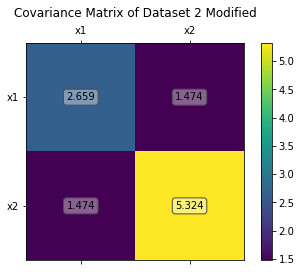

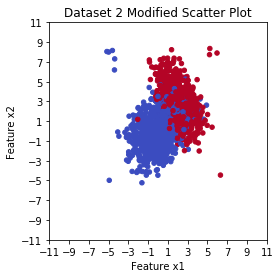

In [243]:
#Implement Part D:
plot_covariance_matrix(dataset2_training_modified[["x1", "x2"]].cov(), "Dataset 2 Modified")
plot_scatter(dataset2_training_modified, "Dataset 2 Modified Scatter Plot", True)

<b>This modified dataset has extra outlier samples compared to the original. As a result its variances are higher.</b>

2. Apply the work on Part B on the Dataset2_modified and compute the classification error on the test set of Dataset2_modified.

In [244]:
mean_c0 = dataset2_training_modified[dataset2_training_modified.y==0][["x1", "x2"]].mean()
cov_mtrx_c0 = dataset2_training_modified[dataset2_training_modified.y==0][["x1", "x2"]].cov()

mean_c1 = dataset2_training_modified[dataset2_training_modified.y==1][["x1", "x2"]].mean()
cov_mtrx_c1 = dataset2_training_modified[dataset2_training_modified.y==1][["x1", "x2"]].cov()

print("\nDataset 2 Modified")
print("Class 0 Mean:", mean_c0.values)
print("Class 0 Covariance:\n", cov_mtrx_c0)
print()
print("Class 1 Mean:", mean_c1.values)
print("Class 1 Covariance:\n", cov_mtrx_c1)


Dataset 2 Modified
Class 0 Mean: [-0.02684779  0.02722913]
Class 0 Covariance:
           x1        x2
x1  2.048429  0.631205
x2  0.631205  3.178140

Class 1 Mean: [2.06659396 2.98488729]
Class 1 Covariance:
           x1        x2
x1  1.078905 -0.780133
x2 -0.780133  3.098057


In [245]:
disc_dataset2_modified = train_bayes(dataset2_training_modified[["x1", "x2"]], dataset2_training_modified["y"])

partd_result = calc_error(disc_dataset2_modified, dataset2_test[["x1", "x2"]], dataset2_test["y"])

print("Dataset 2 Modified Error rate:", "{}%".format(partd_result))

Dataset 2 Modified Error rate: 12.25%


3. Compare the results of Dataset2 in Experiment 1 (i.e., random single partition ofthe data) and those of Dataset2_modified. What can you conclude about Bayes classifier?

<b>As expected, the error rate is slightly increased probably because of new outliers. The unmodified was 11.5%. It seems to me the outliers didn't affect the outcome vastly. This may be because many of the new outliers lie on the correct side of the decision boundary. So the decision boundary still classifies many of them correctly. If there were more outliers on the opposite side of their classes, then I would expect the accuracy to suffer even more.</b>